In [5]:
import numpy as np
import matplotlib.pyplot as plt
from triggered_sampler import TriggeredSampler

In [35]:
# load the data (result_raw.csv)
data = np.loadtxt('result_raw.csv', delimiter=',', skiprows=2)

raw_input = data[:, 3]
demodulated_output = data[:, -2]
demodulated_output_valid = data[:, -3]

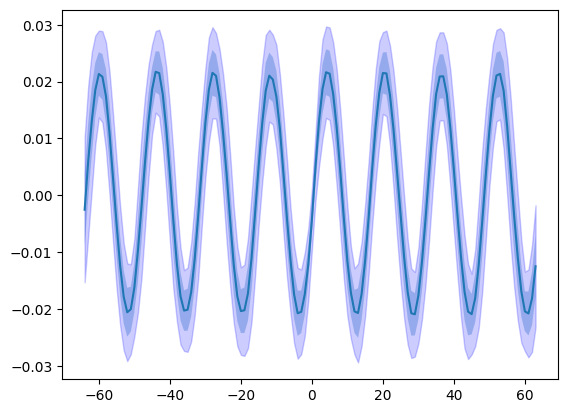

In [30]:
sampler = TriggeredSampler(window_size=128)

# triggr at the rising edge pass zero of the signal
signs  = np.array([x > 0 for x in raw_input], dtype=bool)
trigger = np.array([signs[i] != signs[i-1] and signs[i] for i in range(1, len(signs))], dtype=bool)

# get the triggered samples
triggered_samples = sampler.sample(raw_input, trigger)

fig, ax = plt.subplots()
# sampler.plot_sampled_signal(ax)

average_sig = np.mean(sampler.frames, axis=0)
time_axis = np.arange(128)
zero_time = 128 // 2
time_axis = time_axis - zero_time

mean = np.mean(sampler.frames, axis=0)
std = np.std(sampler.frames, axis=0)
ax.fill_between(time_axis, mean - std, mean + std, alpha=0.3, label='±1 Std Dev')
ax.fill_between(time_axis, mean - 2*std, mean + 2*std, alpha=0.2, color='blue', label='±2 Std Dev')
ax.plot(time_axis, average_sig, label='Average Signal')

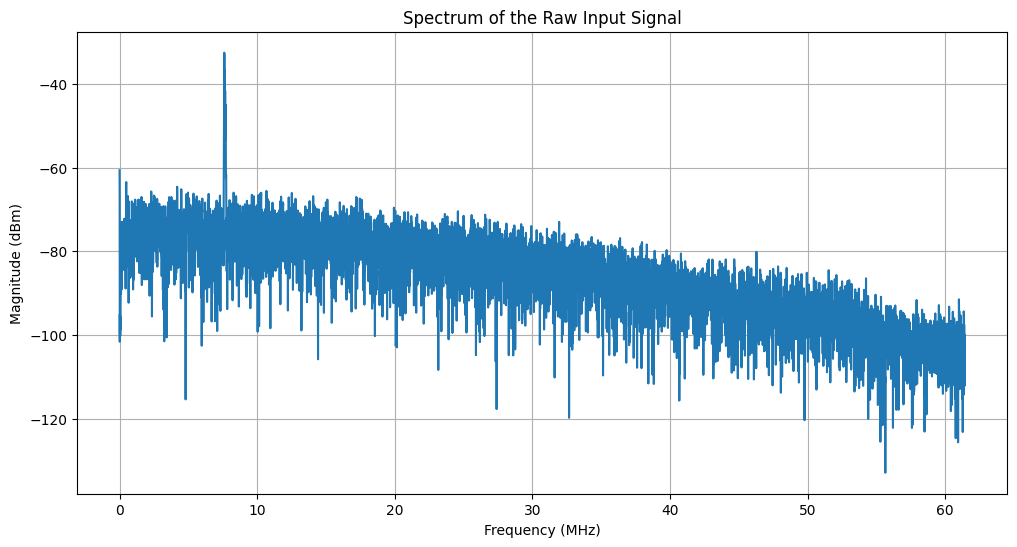

In [27]:
# plot the spectrum of the raw input signal
ts = 1 / 122.88e6  # sampling interval

input_fft = np.fft.fftshift(np.fft.fft(raw_input/2**15 * np.hanning(len(raw_input)))) / len(raw_input)
input_freqs = np.fft.fftshift(np.fft.fftfreq(len(raw_input), ts))
input_dbm_spectrum = 10 * np.log10(np.abs(input_fft)**2 * 50)  # convert to dBm (assuming 50 ohm impedance)
# plot the positive spectrum
input_freqs = input_freqs[len(input_freqs) // 2:]
input_dbm_spectrum = input_dbm_spectrum[len(input_dbm_spectrum) // 2:]
plt.figure(figsize=(12, 6))
plt.plot(input_freqs / 1e6, input_dbm_spectrum)
plt.xlabel('Frequency (MHz)')
plt.ylabel('Magnitude (dBm)')
plt.title('Spectrum of the Raw Input Signal')
plt.grid()


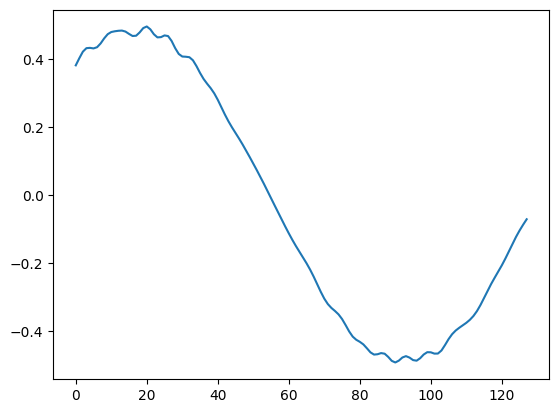

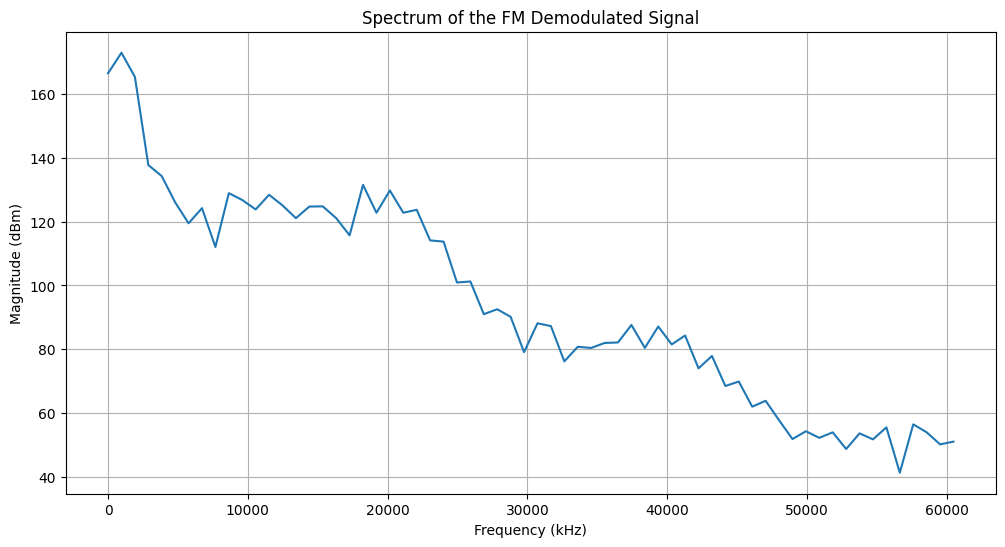

In [39]:
plt.plot(demodulated_output[demodulated_output_valid == 1]/2**29)

demodulated_output_fft = np.fft.fftshift(np.fft.fft(demodulated_output[demodulated_output_valid == 1] * np.hanning(len(demodulated_output[demodulated_output_valid == 1])))) / len(demodulated_output[demodulated_output_valid == 1])
demodulated_output_freqs = np.fft.fftshift(np.fft.fftfreq(len(demodulated_output[demodulated_output_valid == 1]), ts))
demodulated_output_dbm_spectrum = 10 * np.log10(np.abs(demodulated_output_fft)**2 * 50)  # convert to dBm (assuming 50 ohm impedance)
# plot the positive spectrum
demodulated_output_freqs = demodulated_output_freqs[len(demodulated_output_freqs) // 2:]
demodulated_output_dbm_spectrum = demodulated_output_dbm_spectrum[len(demodulated_output_dbm_spectrum) // 2:]
plt.figure(figsize=(12, 6))
plt.plot(demodulated_output_freqs / 1e3, demodulated_output_dbm_spectrum)
plt.xlabel('Frequency (kHz)')
plt.ylabel('Magnitude (dBm)')
plt.title('Spectrum of the FM Demodulated Signal')
plt.grid()